<a href="https://colab.research.google.com/github/Vinitladse/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [229]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly
import plotly.graph_objs as go
import plotly.express as px

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [188]:
# Importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
# load data
data = pd.read_csv('/content/drive/MyDrive/dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [190]:
# First look of the dataset
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [191]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [192]:
# Checking the shape of the dataframe
data.shape

(7787, 12)

In [193]:
# Columns name
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [194]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [195]:
# Find the various statistic for all the columns
data.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [118]:
# Checking the dtypes
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [197]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [198]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [199]:
data['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [200]:
data['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

#### NULL VALUE TREATMENT

1. RATING & COUNTRY - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

2. CAST - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA

3. DATE - there are few missing values for date column. so, lets drop missing value rows.

4. DIRECTOR - Director column has more then 30% null values so dropping that column

In [201]:
data['rating'].replace(np.nan, 'TV-MA', inplace = True)

In [202]:
data['rating'].value_counts()

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [203]:
data['country'].replace(np.nan, 'United States', inplace = True)

In [204]:
data['country'].value_counts()

United States                                                   3062
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [205]:
data['cast'].replace(np.nan, 'missing info', inplace = True)

In [206]:
data = data.drop(columns = ['director'], axis =1)

In [207]:
data = data[data['date_added'].notna()]

In [208]:
data['year_added'] = data['date_added'].apply(lambda x: x.split(" ")[-1])

In [209]:
#Summing the values to get the null values
data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

# **Exploratory Data Analysis**

In [210]:
# Check the Duplicates entries
len (data[data.duplicated()])

0

No duplicates found in the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


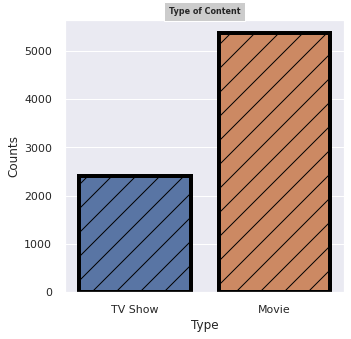

In [218]:
# Plotting the countplot
plt.figure(figsize=(5,5))
ax=sns.countplot('type',data=data,lw=4, ec='black',
                  hatch='/')
plt.title('Type of Content', fontsize=8,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend()
plt.show()
# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


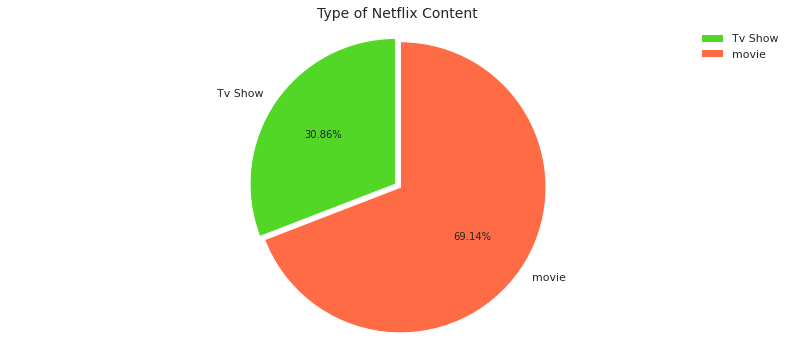

In [227]:
# ploting for pie chart on type feature

plt.figure(figsize =(14,6))
labels = ['Tv Show', 'movie']
plt.pie(data['type'].value_counts().sort_values(),labels=labels, explode =[0.02,0.02],
        autopct='%1.2f%%', colors=['#52D726', '#FF6B45'],startangle = 90)
plt.title('Type of Netflix Content', fontsize = 14)
plt.axis('equal', fontsize = 12)
plt.legend()
plt.show()

###**Moving Rating Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


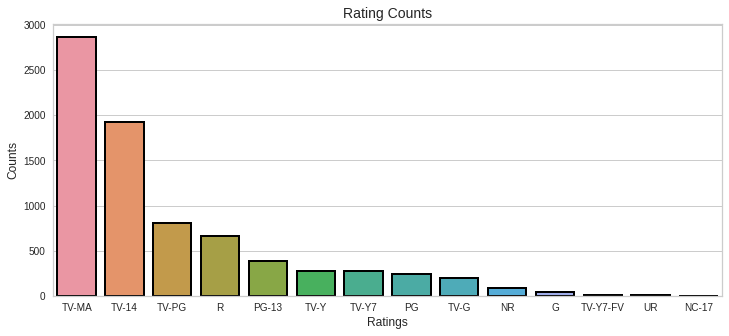

In [133]:
# Ploting the countplot for the Ratings
plt.figure(figsize = (12,5))
ax=sns.countplot('rating', data = data,lw = 2,ec= 'black', 
              order = data['rating'].value_counts(). index)
plt.title('Rating Counts', fontsize = 14)
plt.xlabel('Ratings',fontsize = 12 )
plt.ylabel('Counts', fontsize = 12)
plt.show()


###**Year Month Wise Analysis**

In [134]:
# add new features

data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_year'] = data['date_added'].dt.month

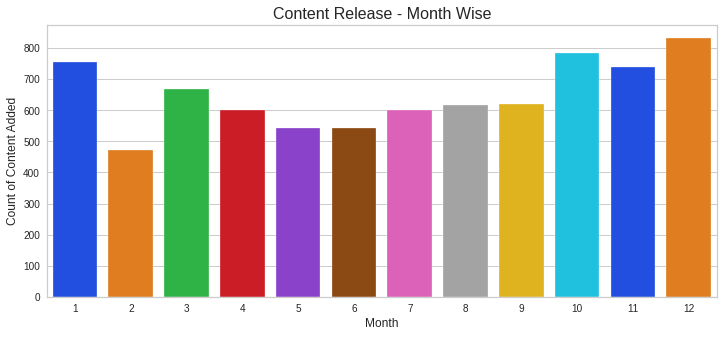

In [135]:
# plot for month wise content release

plt.figure(figsize =(12,5))
sns.countplot(x='month_year', data =data, palette = "bright")
plt.title('Content Release - Month Wise', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Count of Content Added', fontsize = 12)
plt.show()






More of the content is released in holiday season - October, November, December and January.

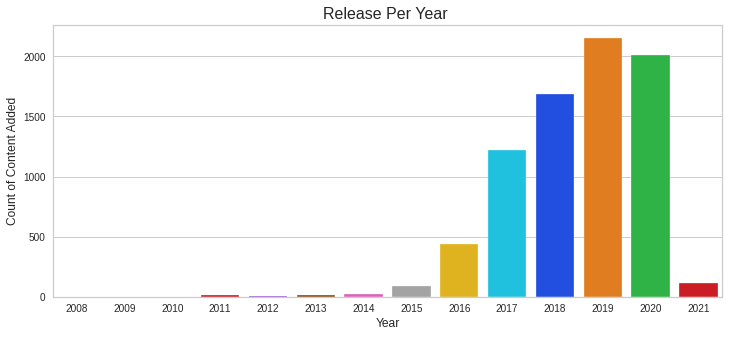

In [136]:
# plot for year wise content release

plt.figure(figsize =(12,5))
sns.countplot(x='year_added', data =data, palette = "bright")
plt.title('Release Per Year ', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count of Content Added', fontsize = 12)
plt.show()

The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19.



In [137]:
# Checking the trend between the 2010 and 2018

data_2010 = data[data['year_added'] >= 2010] 
data_2018 = data[data['year_added'] <= 2018] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


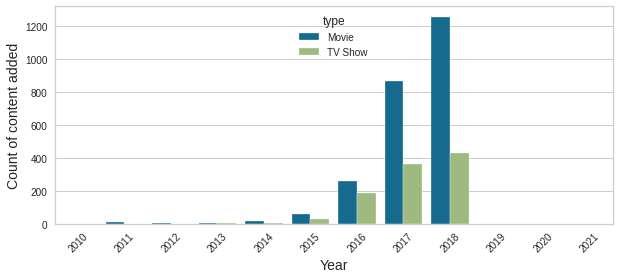

In [138]:
plt.figure(figsize = (10,4))
sns.countplot(data_2010['year_added'], hue= data_2018['type'])
plt.xticks(rotation=45)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count of content added',fontsize = 14)
plt.show()

###**Top 10** **countries**

In [139]:
data['main_country'] = data['country'].apply(lambda x : x.split(",")[0])

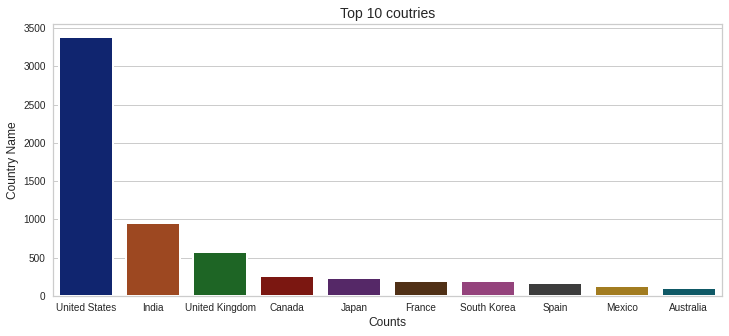

In [140]:
# Top 10 countries on netflix
plt.figure (figsize = (12,5))
ax = sns.countplot(x ='main_country', lw =2,palette = "dark", data= data, order= data['main_country']. value_counts().index[0:10])
plt.title('Top 10 coutries',fontsize=14)
plt.xlabel('Counts', fontsize = 12)
plt.ylabel('Country Name', fontsize = 12)
plt.show()

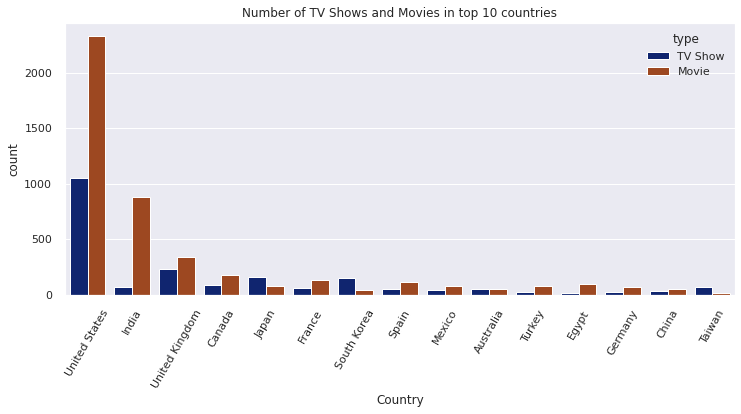

In [141]:
# Number of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(12,5))
ax=sns.countplot(x="main_country",data= data,palette = "dark",hue= "type",order = data['main_country'].value_counts().index[0:15])
plt.xticks(rotation=60)
plt.xlabel('Country', fontsize =12)
plt.title("Number of TV Shows and Movies in top 10 countries",fontsize =12)
plt.show()

Most of the countries have more movies than TV shows but for South Korea and Japan it's the opposite. It maybe because KDramas and Anime are more popular in these two countries respectively

###**Top 10 Actors**

In [142]:
# Getting plot for top actors
# Splitting into list

data['cast_name'] = data['cast'].apply(lambda x :  x.split(','))
cast_count = []

# Count movies for each actor
for i in data['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

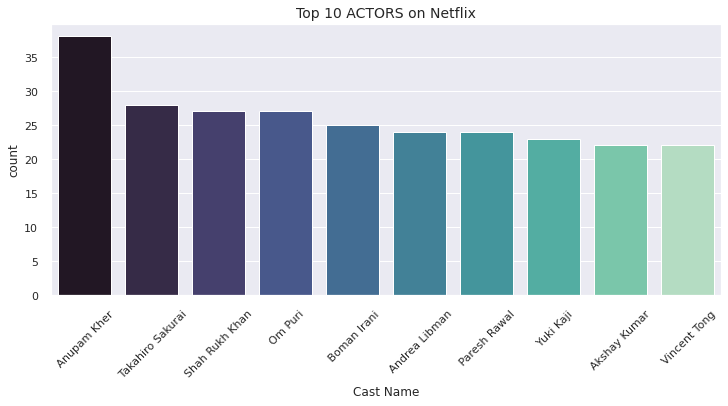

In [143]:
data_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(12,5))
sns.barplot(x='cast_name',y='count',data=data_cast_count,palette= "mako")
plt.title("Top 10 ACTORS on Netflix",fontsize=14)
plt.xlabel('Cast Name', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

###**Top 10 Genres**

In [144]:
# Top 10 genres plot
# Splitting into list
data['listed_in'] = data['listed_in'].apply(lambda x :  x.split(','))
genre_count = []
#count genre for each movie
for i in data['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

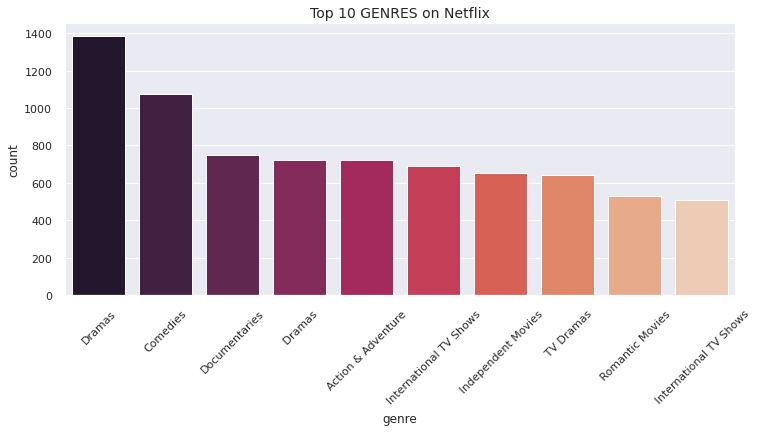

In [145]:
data_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(12,5))
sns.barplot(x='genre',y='count',data= data_genre_count,palette='rocket')
plt.title("Top 10 GENRES on Netflix",fontsize = 14)
plt.xticks(rotation= 45)
plt.show()

In [146]:
# Creating 2 New dataframes for Movie and Tv Shows 

data_tv =data[data['type'] == 'Tv Show'] 
data_movie = data[data['type'] == 'movie']

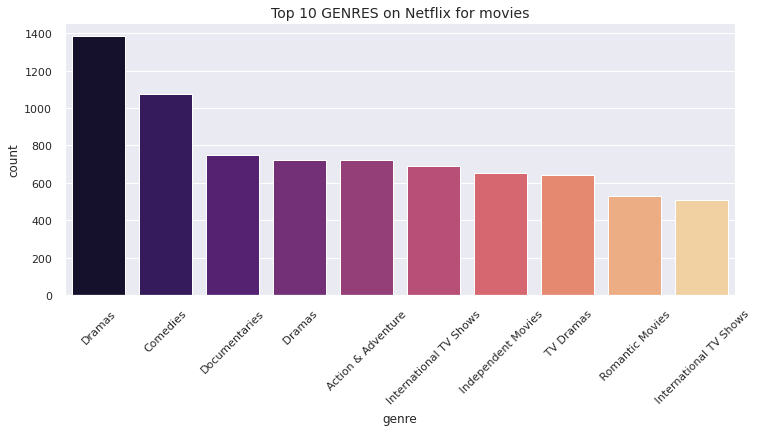

In [147]:
# Top 10 Genre for movies  
data_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(12,5))
sns.barplot(x='genre',y='count',data=data_genre_count,palette="magma")
plt.title("Top 10 GENRES on Netflix for movies",fontsize = 14)
plt.xticks(rotation=45)
plt.show()

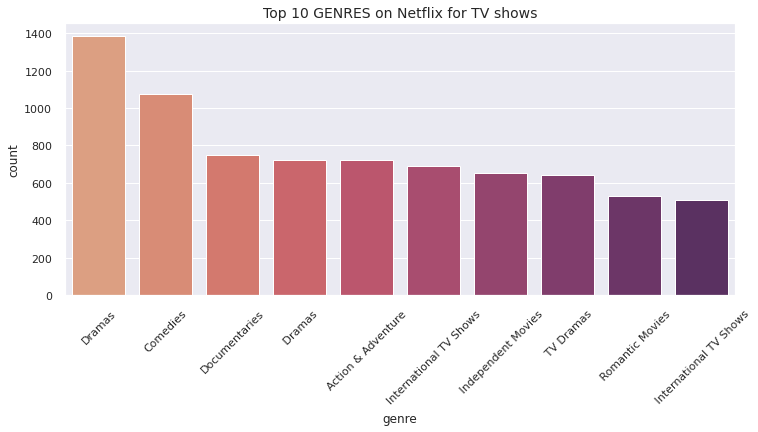

In [148]:
# Top Genre for TV shows

data_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(12,5))
sns.barplot(x='genre',y='count',data=data_genre_count,palette="flare")
plt.title("Top 10 GENRES on Netflix for TV shows",fontsize = 14)
plt.xticks(rotation=45)
plt.show()

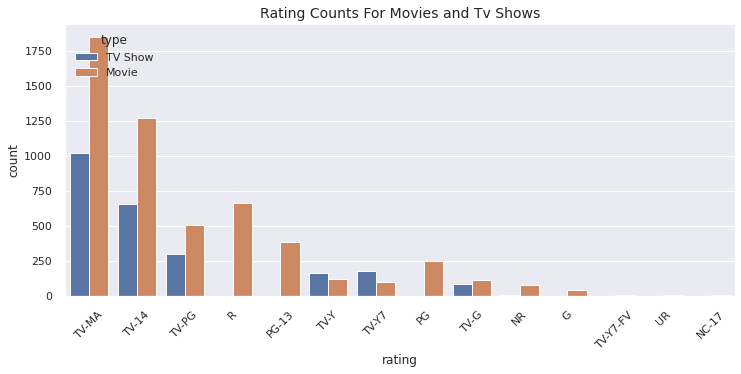

In [149]:
#Plotting the same on a comparison plot

sns.set()
plt.figure(figsize=(12,5))
ax=sns.countplot(x="rating",data= data,hue= "type",order = data['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("Rating Counts For Movies and Tv Shows", fontsize =14)
plt.legend()
plt.show()

###**DATA CLEANING AND PREPROCESSING**

We have made some changes in data just for EDA so we will start our clustering analysis with fresh data and do the manipulations again.

In [150]:
#reading the data again
data = pd.read_csv('/content/drive/MyDrive/dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [151]:
# Replacing the values where the director is null with appropriate strings
data["cast"] = data["cast"].fillna("")
data["country"] = data["country"].fillna("")
data["date_added"] = data["date_added"].fillna("")
data["rating"] = data["rating"].fillna("")
data["director"] = data["director"].fillna("")

In [152]:
# Change cast, country, and listed_in columns from type str to lists
data.cast = data.cast.str.split(',').tolist()
data.country = data.country.str.split(',').tolist()
data.listed_in = data.listed_in.str.split(',').tolist()

In [153]:
# Array of all cast members, countries, ratings, and genres

all_cast = data['cast'].explode().unique()
all_countries = data['country'].explode().unique()
all_ratings = data['rating'].unique()
all_genres = data['listed_in'].explode().unique()

len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(35373, 188, 15, 73)

In [154]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...","[Sweden, Czech Republic, United Kingdom, De...","October 19, 2020",2005,TV-MA,99 min,"[Dramas, International Movies]",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",[India],"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,,[Nasty C],[],"September 25, 2020",2019,TV-MA,44 min,"[Documentaries, International Movies, Music ...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,,"[Adriano Zumbo, Rachel Khoo]",[Australia],"October 31, 2020",2019,TV-PG,1 Season,"[International TV Shows, Reality TV]",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,[],"[United Kingdom, Canada, United States]","March 1, 2020",2019,TV-MA,90 min,"[Documentaries, Music & Musicals]",This documentary delves into the mystique behi...


In [155]:
#combining the required features into one column
data['combined features'] = data['listed_in'].astype(str) + " " + data['description'].astype(str) + " " + data['type'].astype(str) + " "  + data['rating'].astype(str)+ " "+ data['country'].astype(str)+ " " 

In [156]:
#data cleaning
import re
#removing URLs
data['combined features'] = data['combined features'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))
#REMOVING PUNCTUATIONS/NUMBERS/SPECIAL CHARACTERS
data['combined features'] = data['combined features'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))
#lower case
data['combined features'] = data['combined features'].apply(lambda x: x.lower())

###**Remove Stopwords**



In [157]:
#set stopwords
stop = set(stopwords.words('english'))

In [158]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word for word in text.split() if word.lower() not in stop]
    return (text)

In [159]:
#removing stopwords
data['combined features'] = data['combined features'].apply(lambda x: remove_stopwords(x))

**REMOVING SHORT WORDS**

In [160]:
#Removing words with less than 2 letters
data['combined features'] = data['combined features'].apply(lambda x: (w for w in x if len(w)>2))

In [161]:
#import libraries
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [162]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [163]:
# stemming
data['combined features'] = data['combined features'].apply(lambda x: stemming(x))

### **Movie Recommendation**

In [164]:
tfidf = TfidfVectorizer(stop_words='english')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['description'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [165]:
# cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [166]:
movie_names = pd.Series(data.index, index=data['title'])

In [167]:
def recommended_movies_and_shows(title, cosine_sim=cosine_sim):
    name = movie_names[title]
    sim_scores = list(enumerate(cosine_sim[name]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of similar movies
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return data['title'].iloc[movie_indices]

In [168]:
print('IF YOU WATCHED CRIMINAL MINDS,YOU WILL LIKE\n\n',recommended_movies_and_shows('Criminal Minds'))

IF YOU WATCHED CRIMINAL MINDS,YOU WILL LIKE

 833            Beneath the Leaves
497     An Unremarkable Christmas
5882             Sunday's Illness
3533                        Larva
1260                   Chal Bhaag
Name: title, dtype: object


In [169]:
print('IF YOU WATCHED ​​Kuch Bheege Alfaaz,YOU WILL LIKE\n\n',recommended_movies_and_shows('​​Kuch Bheege Alfaaz'))


IF YOU WATCHED ​​Kuch Bheege Alfaaz,YOU WILL LIKE

 7375                       Us and Them
1659                            Deaf U
4151             Mission: Destroy Love
6031    Terrace House: Tokyo 2019-2020
5760               Spirit: Riding Free
Name: title, dtype: object


### **VECTORIZATION**

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(data["combined features"])

pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names()).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abduct,abil,aboard,absurd,abus,academi,accept,access,accid,...,young man,young men,young son,young woman,young women,younger,youth,zani,zealand,zombi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
data.isnull().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
combined features    0
dtype: int64

# **K- Mean Clustering**

In [172]:
# importng libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [173]:
#hperparameter tuning
clusters=[i for i in range(2,103,10)]
silhouette_avg = []
Sum_of_squared_distances = []

In [174]:
# running kmeans
for num_clusters in clusters:
 
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
 #fitting model
 kmeans.fit(x)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(x, cluster_labels))
 Sum_of_squared_distances.append(kmeans.inertia_)

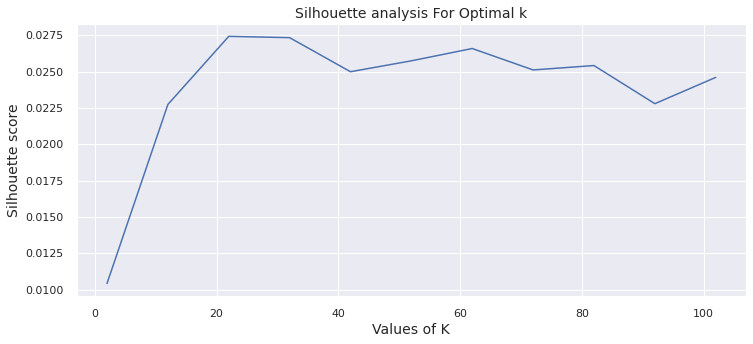

In [175]:
# silhouette score
plt.figure(figsize=(12,5))
plt.plot(clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K', fontsize = 14) 
plt.ylabel('Silhouette score', fontsize = 14) 
plt.title('Silhouette analysis For Optimal k', fontsize = 14)
plt.show()

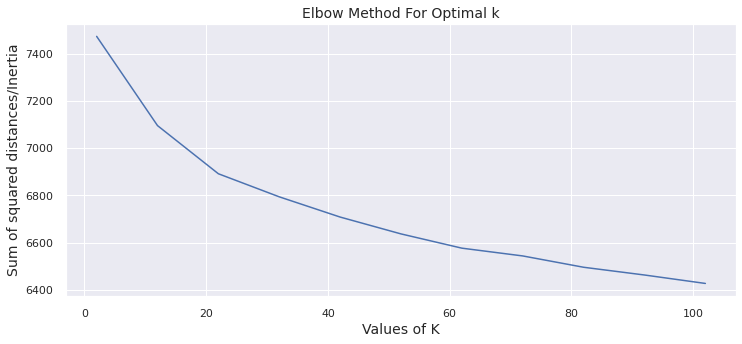

In [176]:
# Elbow method
plt.figure(figsize=(12,5))
plt.plot(clusters,Sum_of_squared_distances,'bx-')

plt.xlabel('Values of K',fontsize =14) 
plt.ylabel('Sum of squared distances/Inertia', fontsize =14) 
plt.title('Elbow Method For Optimal k', fontsize =14)
plt.show()

Based on Silhouette and elbow analysis we can see that the highest Silhouette score is before 30s and have 2 bends before 40s in elbow plot.

Now we have a basic idea of where the optimum number of clusters might lie. We'll run the K Means clustering analysis again this time from 2 to 40 and find the the best number of clusters.

In [177]:
#hperparameter tuning
clusters=[i for i in range(2,41,1)]

In [178]:
# running kmeans
silhouette_avg = []
Sum_of_squared_distances = []
for num_clusters in clusters:
 
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
 #fitting model
 kmeans.fit(x)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(x, cluster_labels))
 Sum_of_squared_distances.append(kmeans.inertia_)

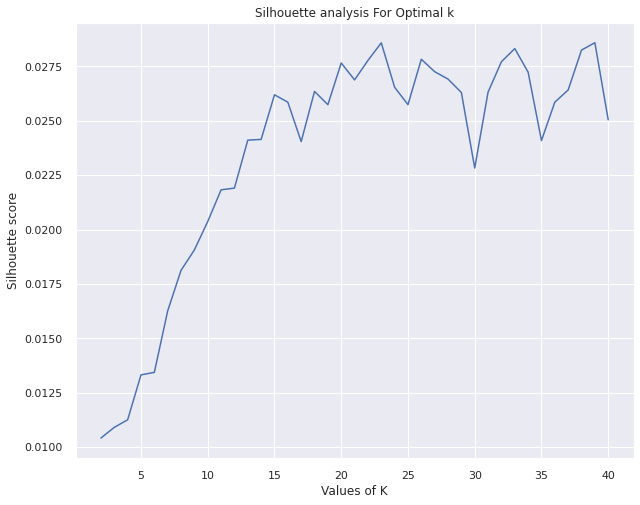

In [179]:
# silhouette score
plt.figure(figsize=(10,8))
plt.plot(clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

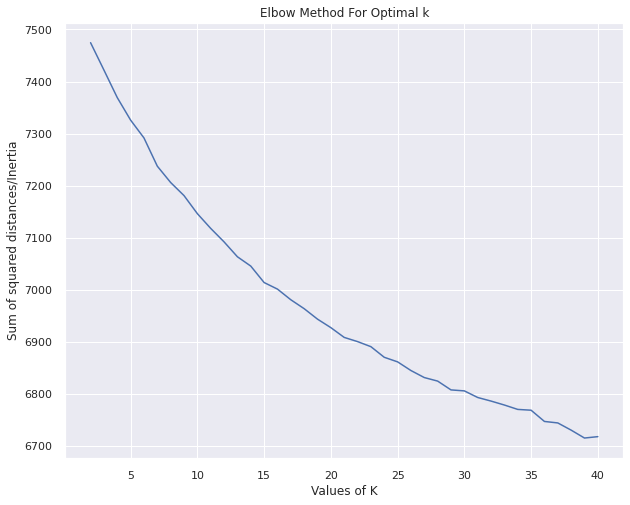

In [180]:
# Elbow method
plt.figure(figsize=(10,8))
plt.plot(clusters,Sum_of_squared_distances,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [181]:
# fitting model
kmeans = KMeans(n_clusters=26, init='k-means++', n_init=10)
kmeans.fit(x)


# prediction
predictions = kmeans.fit_predict(x)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

In [182]:
# Attach cluster predictions to original data frame
data.insert(len(data.columns), column = 'cluster', value = predictions_df.cluster)

In [183]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined features,cluster
0,s1,TV Show,3%,,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,intern show drama sci fantasi futur elit inhab...,14
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit mexico ...,1
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...,5
3,s4,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi...",action adventur independ movi sci fantasi post...,14
4,s5,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,drama brilliant group student becom card count...,21


In [184]:
data[data['cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']]


,type,title,director,cast,country,rating,listed_in,description
1,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],TV-MA,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
15,Movie,Oct-01,Kunle Afolayan,"[Sadiq Daba, David Bailie, Kayode Olaiya, K...",[Nigeria],TV-14,"[Dramas, International Movies, Thrillers]",Against the backdrop of Nigeria's looming inde...
36,Movie,#Selfie,Cristina Jacob,"[Flavia Hojda, Crina Semciuc, Olimpia Melint...",[Romania],TV-MA,"[Comedies, Dramas, International Movies]","Two days before their final exams, three teen ..."
37,Movie,#Selfie 69,Cristina Jacob,"[Maia Morgenstern, Olimpia Melinte, Crina Se...",[Romania],TV-MA,"[Comedies, Dramas, International Movies]","After a painful breakup, a trio of party-lovin..."
39,Movie,"¡Ay, mi madre!",Frank Ariza,"[Estefanía de los Santos, Secun de la Rosa, ...",[Spain],TV-MA,"[Comedies, International Movies]","When her estranged mother suddenly dies, a wom..."
...,...,...,...,...,...,...,...,...
7748,Movie,الف مبروك,Ahmed Nader Galal,"[Ahmed Helmy, Laila Ezz El Arab, Mahmoud El ...",[Egypt],TV-14,"[Comedies, Dramas, International Movies]","On his wedding day, an arrogant, greedy accoun..."
7751,Movie,Yucatán,Daniel Monzón,"[Luis Tosar, Rodrigo de la Serna, Joan Pera,...",[Spain],TV-MA,"[Comedies, International Movies]",Competing con artists attempt to creatively an...
7765,Movie,Zero Hour,Robert O. Peters,"[Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, ...",[],TV-MA,"[International Movies, Thrillers]","After his father passes, the heir to a retail ..."
7770,Movie,Zinzana,Majid Al Ansari,"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jab...","[United Arab Emirates, Jordan]",TV-MA,"[Dramas, International Movies, Thrillers]",Recovering alcoholic Talal wakes up inside a s...


In [185]:
data[data['cluster'] ==4][['type','title','director','cast','country','rating','listed_in','description']]


,type,title,director,cast,country,rating,listed_in,description
13,Movie,"2,215",Nottapon Boonprakob,[Artiwara Kongmalai],[Thailand],TV-MA,"[Documentaries, International Movies, Sports...",This intimate documentary follows rock star Ar...
19,Movie,'89,,"[Lee Dixon, Ian Wright, Paul Merson]",[United Kingdom],TV-PG,[Sports Movies],"Mixing old footage with interviews, this is th..."
35,Movie,#Rucker50,Robert McCullough Jr.,[],[United States],TV-PG,"[Documentaries, Sports Movies]",This documentary celebrates the 50th anniversa...
47,Movie,1 Mile to You,Leif Tilden,"[Billy Crudup, Graham Rogers, Liana Liberato...",[United States],TV-14,"[Dramas, Romantic Movies, Sports Movies]",After escaping the bus accident that killed hi...
54,Movie,100 Meters,Marcel Barrena,"[Dani Rovira, Karra Elejalde, Alexandra Jimé...","[Portugal, Spain]",TV-MA,"[Dramas, International Movies, Sports Movies]",A man who is diagnosed with multiple sclerosis...
...,...,...,...,...,...,...,...,...
7626,Movie,Williams,Morgan Matthews,[],[United Kingdom],TV-MA,"[Documentaries, International Movies, Sports...",This inspiring documentary charts the birth of...
7652,Movie,Wolves,Bart Freundlich,"[Michael Shannon, Carla Gugino, Taylor John ...",[United States],R,"[Dramas, Independent Movies, Sports Movies]",A promising high school basketball player has ...
7686,Movie,XV: Beyond the Tryline,Pierre Deschamps,[],[United Kingdom],TV-14,"[Documentaries, Sports Movies]","Set against the 2015 Rugby World Cup, this doc..."
7688,Movie,XXx,Rob Cohen,"[Vin Diesel, Asia Argento, Marton Csokas, S...",[United States],PG-13,"[Action & Adventure, Sports Movies]",A notorious underground rush-seeker deemed unt...


In [186]:
data[data['cluster'] == 15][['type','title','director','cast','country','rating','listed_in','description']]


,type,title,director,cast,country,rating,listed_in,description
31,Movie,#FriendButMarried,Rako Prijanto,"[Adipati Dolken, Vanesha Prescilla, Rendi Jh...",[Indonesia],TV-G,"[Dramas, International Movies, Romantic Movies]","Pining for his high school crush for years, a ..."
32,Movie,#FriendButMarried 2,Rako Prijanto,"[Adipati Dolken, Mawar de Jongh, Sari Nila, ...",[Indonesia],TV-G,"[Dramas, International Movies, Romantic Movies]",As Ayu and Ditto finally transition from best ...
34,Movie,#Roxy,Michael Kennedy,"[Jake Short, Sarah Fisher, Booboo Stewart, ...",[Canada],TV-14,"[Comedies, Romantic Movies]",A teenage hacker with a huge nose helps a cool...
48,Movie,10 Days in Sun City,Adze Ugah,"[Ayo Makun, Adesua Etomi, Richard Mofe-Damij...","[South Africa, Nigeria]",TV-14,"[Comedies, International Movies, Romantic Mo...",After his girlfriend wins the Miss Nigeria pag...
106,Movie,365 Days,"Barbara Białowąs, Tomasz Mandes","[Anna-Maria Sieklucka, Michele Morrone, Bron...",[Poland],TV-MA,"[Dramas, International Movies, Romantic Movies]",A fiery executive in a spiritless relationship...
...,...,...,...,...,...,...,...,...
7732,Movie,You're My Boss,Antoinette Jadaone,"[Toni Gonzaga, Coco Martin, Freddie Webb, J...",[Philippines],TV-14,"[Comedies, International Movies, Romantic Mo...","Pong, a corporate assistant, poses as his comp..."
7734,Movie,You've Got This,Salvador Espinosa,"[Mauricio Ochmann, Esmeralda Pimentel, Matte...",[Mexico],TV-MA,"[Comedies, International Movies, Romantic Mo...",An ad creative and a successful exec have a gr...
7758,Movie,Zack and Miri Make a Porno,Kevin Smith,"[Seth Rogen, Elizabeth Banks, Craig Robinson...",[United States],R,"[Comedies, Independent Movies, Romantic Movies]",Zack and Miri make and star in an adult film t...
7760,Movie,Zaki Chan,Wael Ihsan,"[Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny...",[Egypt],TV-PG,"[Comedies, International Movies, Romantic Mo...",An unqualified young man has his work cut out ...


# **Conclusion**

There are about 70% movies and 30% TV shows on Netflix.

The United States has the highest number of content on Netflix by a huge margin followed by India.

Recommendation system works perfectly well with description column

Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are
Anupam Kher has acted in the highest number of films on Netflix.

Drama is the most popular genre followed by comedy.

More of the content is released in holiday season - October, November, December and January.

The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.

NULL HYPOTHESIS -The number of TV shows on Netflix have tripled and number of movies have reduced by 2000 between 2010 and 2018. (REJECTED)

The optimum number of clusters is 26.
